RANDOM FOREST MODEL

Data Preparation

In [112]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


# Reading data file: 
dataframe = pd.read_csv('./X_train.csv', error_bad_lines=False, sep=',')

# Setting y: 
predict = dataframe['MQT1_category']
y_train = predict

In [113]:
dataframe_t = pd.read_csv('./X_test.csv', error_bad_lines=False, sep = ',')
dataframe_t['MQT1_category'].value_counts()

3.0    106
4.0     48
5.0     37
1.0     30
2.0     21
Name: MQT1_category, dtype: int64

In [114]:
predict_t = dataframe_t['MQT1_category']
y_test = predict_t
dataframe_t.drop('MQT1_category', axis = 1, inplace = True)
X_test = dataframe_t
X_test.shape, y_test.shape

((242, 129), (242,))

In [115]:
correlationMQ1 = dataframe.corr()['MQT1_category'].abs().sort_values(ascending = False)
correlationMQ1

MQT1_category                   1.000000
veel_leeftijdsgenoten           0.159286
sportmogelijkheden_buurt        0.152230
postcode_cijfers                0.145996
Respondentnummer                0.140750
                                  ...   
8. Bal schoppen                 0.003242
cult_achtergrond_partner        0.001096
fietsen_zonder_zijwielen_mnd    0.000970
zelf_kruipen_mnd                0.000779
Lengte (in m)                        NaN
Name: MQT1_category, Length: 130, dtype: float64

In [116]:
dataframe.drop('MQT1_category', axis = 1, inplace = True)
dataframe

,Respondentnummer,Gender,Geboortedatum,Age on testday (t0),Lengte (afgerond op 0.1 cm),Gewicht (afgerond op 0.1 kg),Lengte (in m),Gymles,Zwemles J/N,Zwemles,...,belonen_wanneer_rustig,buitenspeel_materiaal_beschikbaar,tv_bezighouden,niet_buiten_verkeersveiligheid,niet_buiten_criminaliteit,toestaan_langetijd_schermen,Zip-code school,MQT0_category,BMI_category,Age differents
0,0.960157,0.0,0.025735,0.666667,0.473684,0.380952,0.0,0.75,0.0,1.00,...,0.50,1.0,0.50,0.25,0.50,0.50,0.348436,0.25,0.0,0.0
1,0.985381,0.0,0.045956,0.666667,0.421053,0.285714,0.0,0.75,0.0,0.50,...,0.25,1.0,0.50,0.00,0.00,0.50,0.348436,0.50,0.0,0.5
2,0.980116,1.0,0.625000,0.333333,0.500000,0.476190,0.0,1.00,1.0,1.00,...,0.50,1.0,0.25,0.00,0.00,0.50,0.348436,1.00,0.0,0.5
3,0.980270,1.0,0.544118,0.333333,0.394737,0.285714,0.0,1.00,1.0,1.00,...,0.25,1.0,0.50,0.00,0.00,0.50,0.348436,0.25,0.0,0.0
4,0.970199,0.0,0.759191,0.666667,0.578947,0.380952,0.0,1.00,0.0,0.75,...,0.00,1.0,0.50,0.00,0.00,0.25,0.348436,0.75,0.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,0.955445,0.0,0.262868,0.666667,0.736842,0.571429,0.0,1.00,0.0,1.00,...,0.50,1.0,0.00,0.00,0.00,0.25,0.348436,0.75,0.0,0.0
1571,0.995362,1.0,0.104779,0.666667,0.368421,0.238095,0.0,1.00,0.0,1.00,...,0.25,1.0,0.25,0.00,0.00,0.50,0.348436,0.50,0.0,0.5
1572,0.995138,1.0,0.619485,0.000000,0.210526,0.190476,0.0,1.00,1.0,1.00,...,0.00,1.0,1.00,1.00,1.00,0.75,0.348436,0.50,0.0,0.0
1573,0.497472,1.0,0.551471,1.000000,0.552632,0.523810,0.0,0.75,0.0,0.50,...,0.75,1.0,0.75,0.25,0.25,0.75,0.331176,0.25,0.5,0.5


In [117]:
X_train = dataframe

X_train.shape, y_train.shape

((1575, 129), (1575,))

Using Random Forest Model Classifier

Score of training: 0.9917460317460317
Score of testing: 0.39669421487603307
Accuracy score of Random Forest is: 0.39669421487603307
Confusion matrix of Random Forest is: 
[[ 9  1 15  3  2]
 [ 3  0 17  0  1]
 [10  3 76 10  7]
 [ 6  2 32  3  5]
 [ 2  0 21  6  8]]


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


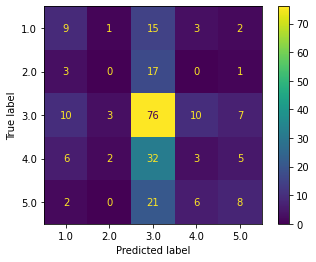

Classification report of Random Forest is: 
              precision    recall  f1-score   support

         1.0       0.30      0.30      0.30        30
         2.0       0.00      0.00      0.00        21
         3.0       0.47      0.72      0.57       106
         4.0       0.14      0.06      0.09        48
         5.0       0.35      0.22      0.27        37

    accuracy                           0.40       242
   macro avg       0.25      0.26      0.24       242
weighted avg       0.32      0.40      0.34       242



In [118]:
# RandomForest model:
randomForest_model = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_leaf=1)

# Using RandomForest model classifier in order to fit the data:
randomForest_model.fit(X_train, y_train)

# Predicting the y-data with the RandomForest classifier: 
y_predict = randomForest_model.predict(X_test)

# Getting the scores for the X_test and y_test subsets:
randomForest_model.score(X_test, y_test)

# Printing the scores:
print('Score of training: {}'.format(randomForest_model.score(X_train, y_train)))
print('Score of testing: {}'.format(randomForest_model.score(X_test, y_test)))

# Calculating the accuracy score: 
accuracyScore = accuracy_score(y_test, y_predict)

# Printing the accuracy score: 
print(f"Accuracy score of Random Forest is: {accuracyScore}")

# Calculation the confusion matrix: 
confusionMatrix = confusion_matrix(y_test, y_predict)

# Printing the confusion matrix: 
print(f"Confusion matrix of Random Forest is: \n{confusionMatrix}")

# Plotting the confusion matrix: 
plot_confusion_matrix(randomForest_model, X_test, y_test)
plt.show()

# Calculating the classification report: 
classificationReport = classification_report(y_test, y_predict)

# Printing the classification report: 
print(f"Classification report of Random Forest is: \n{classificationReport}")

In [119]:
X_test['Predicted_MQT1_category'] = y_predict
X_test

,Respondentnummer,Gender,Geboortedatum,Age on testday (t0),Lengte (afgerond op 0.1 cm),Gewicht (afgerond op 0.1 kg),Lengte (in m),Gymles,Zwemles J/N,Zwemles,...,buitenspeel_materiaal_beschikbaar,tv_bezighouden,niet_buiten_verkeersveiligheid,niet_buiten_criminaliteit,toestaan_langetijd_schermen,Zip-code school,MQT0_category,BMI_category,Age differents,Predicted_MQT1_category
0,0.985241,0.0,0.325368,0.666667,0.736842,0.523810,0.0,1.00,0.0,0.75,...,0.75,0.50,0.00,0.00,0.50,0.348436,1.00,0.0,0.5,3.0
1,0.994969,0.0,0.738971,0.000000,0.342105,0.190476,0.0,1.00,0.0,0.00,...,1.00,0.50,0.50,0.00,0.50,0.348436,0.50,0.0,0.0,2.0
2,0.457714,0.0,0.444853,0.666667,0.500000,0.428571,0.0,1.00,0.0,0.50,...,0.75,0.50,0.25,0.00,0.25,0.961165,0.25,0.0,0.5,3.0
3,0.970134,0.0,0.071691,0.666667,0.578947,0.285714,0.0,1.00,0.0,0.75,...,0.75,0.50,0.25,0.00,0.25,0.348436,0.50,0.0,0.5,3.0
4,0.547451,1.0,0.341912,0.666667,0.605263,0.333333,0.0,1.00,1.0,1.00,...,0.75,0.25,0.25,0.25,0.25,0.282632,1.00,0.0,0.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,0.995357,1.0,0.509191,0.333333,0.421053,0.333333,0.0,1.00,0.0,0.50,...,1.00,0.25,0.50,0.25,0.25,0.348436,0.50,0.0,0.0,1.0
238,0.970174,1.0,0.301471,0.000000,0.315789,0.142857,0.0,1.00,0.0,1.00,...,1.00,0.00,0.50,0.50,0.00,0.348436,0.50,0.0,0.0,3.0
239,0.527383,1.0,0.689338,0.666667,0.526316,0.333333,0.0,1.00,0.0,1.00,...,0.75,0.25,0.75,0.25,0.00,0.000000,0.25,0.0,0.5,3.0
240,0.955236,0.0,0.663603,0.666667,0.500000,0.285714,0.0,1.00,0.0,1.00,...,1.00,0.50,0.00,0.00,0.25,0.348436,0.50,0.0,0.5,4.0


In [120]:
CMQT1_predicted = X_test.corr()['Predicted_MQT1_category'].abs().sort_values(ascending = False)
CMQT1_predicted

Predicted_MQT1_category           1.000000
postcode_cijfers                  0.309267
Respondentnummer                  0.299458
drukte_buurt                      0.243904
Age on testday (t0)               0.185438
                                    ...   
corrigeren_tedruk                 0.004872
niet_buiten_verkeersveiligheid    0.003918
grove_motoriek                    0.001205
omgang_leeftijdsgenoten           0.001076
Lengte (in m)                          NaN
Name: Predicted_MQT1_category, Length: 130, dtype: float64

In [121]:
print(RandomForestClassifier._estimator_type)

classifier


In [122]:
print(len(X_test.columns))
print(len(X_train.columns))
print(len(X_test.index))
print(len(X_train.index))

130
129
242
1575


Using Hyperparameter Tuning on Random Forest model

Hyperparameter Tuning with GridSearch

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1872, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classifi

[CV] END .max_depth=20, min_samples_leaf=1, n_estimators=200; total time=   0.5s
[CV] END .max_depth=20, min_samples_leaf=1, n_estimators=200; total time=   0.5s
[CV] END .max_depth=20, min_samples_leaf=1, n_estimators=200; total time=   0.5s


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 762, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1872, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/metrics/_classifi

Model Performance
Average Error: 0.9628 degrees.
Accuracy = 59.61%.
59.607438016528924
Accuracy score of Random Forest is: 0.40082644628099173
Confusion matrix of Random Forest is: 
[[11  1 13  4  1]
 [ 4  0 15  1  1]
 [11  3 75  8  9]
 [ 5  2 31  5  5]
 [ 2  0 23  6  6]]


/opt/jupyterhub/anaconda/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


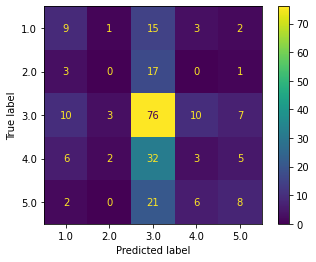

Score of training: 0.9917460317460317
Score of testing: 0.39669421487603307
Classification report of Random Forest is: 
              precision    recall  f1-score   support

         1.0       0.30      0.30      0.30        30
         2.0       0.00      0.00      0.00        21
         3.0       0.47      0.72      0.57       106
         4.0       0.14      0.06      0.09        48
         5.0       0.35      0.22      0.27        37

    accuracy                           0.40       242
   macro avg       0.25      0.26      0.24       242
weighted avg       0.32      0.40      0.34       242



In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Reading data files and definining X and y train: 
X_train = pd.read_csv('X_train.csv', error_bad_lines=False, sep=',')
y_train = X_train['MQT1_category']

# Data Preparation: 
X_train.drop('MQT1_category', axis = 1, inplace = True)

# Reading data files and defining X and y test: 
X_test = pd.read_csv('X_test.csv', error_bad_lines=False, sep = ',')
y_test = X_test['MQT1_category']

# Data Preparation: 
X_test.drop('MQT1_category', axis = 1, inplace = True)

# Using Hyperparameter tuning on Random Forest model: 
# GridSearch:  

# Creating the parameter grid: 
grid_values = {
    'n_estimators': [200], 
    'max_depth': [20], 
    'min_samples_leaf': [1]
}
grid_search = GridSearchCV(estimator = randomForest_model, param_grid = grid_values, cv = 3, n_jobs = -1, verbose = 2, scoring = 'recall')
grid_search.fit(X_train, y_train)

grid_search.best_params_

best_grid = grid_search.best_estimator_

# evaluate method from: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
def evaluate(model, test_features, test_labels): 
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

grid_accuracy = evaluate(best_grid, X_test, y_test)

# Printing grid accuracy: 
print(grid_accuracy)

# Predicting values based on the new parameters:
y_predict_acc = grid_search.predict(X_test)

# Calculating the accuracy score: 
accuracyScore = accuracy_score(y_test, y_predict_acc)

# Printing the accuracy score: 
print(f"Accuracy score of Random Forest is: {accuracyScore}")

# Calculation the confusion matrix: 
confusionMatrix = confusion_matrix(y_test, y_predict_acc)

# Printing the confusion matrix: 
print(f"Confusion matrix of Random Forest is: \n{confusionMatrix}")

# Plotting the confusion matrix: 
plot_confusion_matrix(randomForest_model, X_test, y_test)
plt.show()

# Printing the scores:
print('Score of training: {}'.format(randomForest_model.score(X_train, y_train)))
print('Score of testing: {}'.format(randomForest_model.score(X_test, y_test)))

# Calculating the classification report: 
classificationReport = classification_report(y_test, y_predict)

# Printing the classification report: 
print(f"Classification report of Random Forest is: \n{classificationReport}")